In [2]:
!pip install pyspark

In [3]:
from pyspark import SparkContext
sc = SparkContext("local[1]", "ejemplos_analisis_rdd")

## **Ejemplo 1**

In [4]:
# Lectura del archivo
rdd = sc.textFile("/content/texto1.txt")
rdd.collect()

['Este es un texto de prueba',
 'Utiliza funcionalidades de Spark',
 'Especialmente usa Spark con Python',
 'Spark puede usar Python o Scala',
 'Es posible Usar otros lenguajes',
 'Usaremos Python']

In [5]:
# Separar por palabras en cada línea
rdd.map(lambda x: x.lower().split(' ')).collect()

[['este', 'es', 'un', 'texto', 'de', 'prueba'],
 ['utiliza', 'funcionalidades', 'de', 'spark'],
 ['especialmente', 'usa', 'spark', 'con', 'python'],
 ['spark', 'puede', 'usar', 'python', 'o', 'scala'],
 ['es', 'posible', 'usar', 'otros', 'lenguajes'],
 ['usaremos', 'python']]

In [6]:
# Similar a la función lambda anterior, pero usando una función con nombre
def funcion1(x):
  y = x.lower()
  z = y.split(' ')
  return z

rdd2 = rdd.map(funcion1)

In [7]:
# Filtrar los RDDs donde aparece la palabra Python
rdd2.filter(lambda x: "python" in x).collect()

[['especialmente', 'usa', 'spark', 'con', 'python'],
 ['spark', 'puede', 'usar', 'python', 'o', 'scala'],
 ['usaremos', 'python']]

In [8]:
# Almacenar un RDD (se especifica el nombre de la carpeta)
rdd2.saveAsTextFile("/content/salida")

In [9]:
# Dividir las palabras sin estructura ("flat")
rdd3 = rdd.flatMap(lambda x: x.lower().split())
# Mostrar solo las 10 primeras
rdd3.take(10)

['este',
 'es',
 'un',
 'texto',
 'de',
 'prueba',
 'utiliza',
 'funcionalidades',
 'de',
 'spark']

In [10]:
# Palabras que se eliminará
stop_words = ["este", "de", "es", "un"]
# Filtraje: mantener solo las palabras que no estén en "stop_words"
rdd4 = rdd3.filter(lambda x: x not in stop_words)

#rdd4.distinct().collect()
rdd4.collect()

['texto',
 'prueba',
 'utiliza',
 'funcionalidades',
 'spark',
 'especialmente',
 'usa',
 'spark',
 'con',
 'python',
 'spark',
 'puede',
 'usar',
 'python',
 'o',
 'scala',
 'posible',
 'usar',
 'otros',
 'lenguajes',
 'usaremos',
 'python']

In [11]:
# Se desea solo las palabras que comienzan con s
rdd5 = rdd3.filter(lambda x: x.startswith('s'))
rdd5.collect()

['spark', 'spark', 'spark', 'scala']

In [12]:
# Quedarse solo con los elementos que son diferentes
rdd5.distinct().collect()

['spark', 'scala']

## **Ejemplo 2**

In [13]:
rdd0 = sc.textFile("/content/texto1.txt")
rdd = rdd0.flatMap(lambda x: x.lower().split(' '))
rdd.take(10)

['este',
 'es',
 'un',
 'texto',
 'de',
 'prueba',
 'utiliza',
 'funcionalidades',
 'de',
 'spark']

In [14]:
# Número de elementos en el RDD
rdd.count()

28

In [15]:
# Verificar la longitud de generar muestras aleatorias usando "sample" con 50% (5 intentos)
for i in range(5):
  print( len(rdd3.sample(False, 0.5).collect()) )

15
11
13
15
14


In [16]:
# Agrupar según primera letra
rdd2 = rdd.groupBy(lambda x: x[0])
rdd2.collect()

[('e', <pyspark.resultiterable.ResultIterable at 0x7fe0e6aa4a50>),
 ('u', <pyspark.resultiterable.ResultIterable at 0x7fe0e6aa4b10>),
 ('t', <pyspark.resultiterable.ResultIterable at 0x7fe0e6a9a0d0>),
 ('d', <pyspark.resultiterable.ResultIterable at 0x7fe0e6a9a310>),
 ('p', <pyspark.resultiterable.ResultIterable at 0x7fe0e6a9a750>),
 ('f', <pyspark.resultiterable.ResultIterable at 0x7fe0e6a9ae10>),
 ('s', <pyspark.resultiterable.ResultIterable at 0x7fe0e6a9a6d0>),
 ('c', <pyspark.resultiterable.ResultIterable at 0x7fe0e6a9a4d0>),
 ('o', <pyspark.resultiterable.ResultIterable at 0x7fe0e6a9aa50>),
 ('l', <pyspark.resultiterable.ResultIterable at 0x7fe0e6a9a290>)]

In [17]:
# Convertir en lista los valores que son iterables (para poder mostrarlos)
rdd2.mapValues(list).collect()

[('e', ['este', 'es', 'especialmente', 'es']),
 ('u', ['un', 'utiliza', 'usa', 'usar', 'usar', 'usaremos']),
 ('t', ['texto']),
 ('d', ['de', 'de']),
 ('p', ['prueba', 'python', 'puede', 'python', 'posible', 'python']),
 ('f', ['funcionalidades']),
 ('s', ['spark', 'spark', 'spark', 'scala']),
 ('c', ['con']),
 ('o', ['o', 'otros']),
 ('l', ['lenguajes'])]

In [18]:
# Similar al anterior, pero usando herramientas nativas de Python
[(k, list(v))  for (k, v) in rdd2.collect()]

[('e', ['este', 'es', 'especialmente', 'es']),
 ('u', ['un', 'utiliza', 'usa', 'usar', 'usar', 'usaremos']),
 ('t', ['texto']),
 ('d', ['de', 'de']),
 ('p', ['prueba', 'python', 'puede', 'python', 'posible', 'python']),
 ('f', ['funcionalidades']),
 ('s', ['spark', 'spark', 'spark', 'scala']),
 ('c', ['con']),
 ('o', ['o', 'otros']),
 ('l', ['lenguajes'])]

## **Ejemplo 3**

In [19]:
rdd = sc.textFile("/content/u.data")
rdd.take(3)

['196\t242\t3\t881250949', '186\t302\t3\t891717742', '22\t377\t1\t878887116']

In [20]:
# Separar cada línea a partir de las comas
rdd.map(lambda x: x.split()).take(3)

[['196', '242', '3', '881250949'],
 ['186', '302', '3', '891717742'],
 ['22', '377', '1', '878887116']]

In [21]:
# Separar cada línea y tomar solo el elemento 3 (con índice 2) que correponde a los "ratings"
ratings = rdd.map(lambda x: x.split()[2])
ratings.take(3)

['3', '3', '1']

In [22]:
# Contar el número de veces que se repite cada elemento del RDD ("frecuencia")
resultado = ratings.countByValue()
resultado

defaultdict(int, {'1': 6110, '2': 11370, '3': 27145, '4': 34174, '5': 21201})

In [23]:
# Mostrar los valores en un iterable
for k, v in resultado.items():
  print(k, v)

3 27145
1 6110
2 11370
4 34174
5 21201


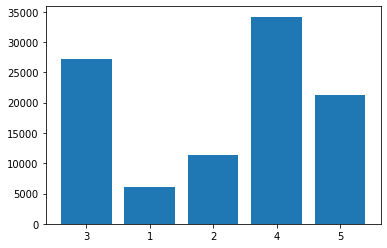

In [24]:
# Gráfico de barras ("histograma")
import matplotlib.pyplot as plt

plt.bar(resultado.keys(), resultado.values())
plt.show()
# Notar que las claves no se encuentran ordenadas

In [25]:
# Ordenar según las claves
ordenado = sorted(resultado.items())
print(ordenado)

[('1', 6110), ('2', 11370), ('3', 27145), ('4', 34174), ('5', 21201)]


In [26]:
#Convertir a un diccionario ordenado
import collections

resultadoOrdenado = collections.OrderedDict(ordenado)
resultadoOrdenado

OrderedDict([('1', 6110),
             ('2', 11370),
             ('3', 27145),
             ('4', 34174),
             ('5', 21201)])

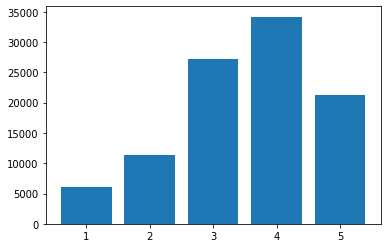

In [27]:
# Gráfico de barras ("histograma")
import matplotlib.pyplot as plt

plt.bar(resultadoOrdenado.keys(), resultadoOrdenado.values())
plt.show()

### Tupla con nombre

In [28]:
from collections import namedtuple

# Tupla con nombre llamada "Tupla"
Tupla = namedtuple("Tupla", ["nombre1", "nombre2"])

# Creación de una tupla
t = Tupla(40, 25)

In [29]:
# Acceso al primer elemento de la tupa
print(t[0])          # Usando el índice
print(t.nombre1)     # Usando el nombre del elemento (similar a un atributo)

40
40


## **Ejemplo 4**

In [30]:
# Lectura del archivo
f = sc.textFile("/content/DowJones5.csv")

f.take(3)

['Date,Open,High,Low,Close,Adj Close,Volume',
 '2014-10-27,16796.099609,16836.980469,16729.830078,16817.939453,16817.939453,72580000',
 '2014-10-28,16825.189453,17006.449219,16825.189453,17005.750000,17005.750000,83870000']

In [31]:
# Recuperar los nombres de la primera fila (como una lista)
header = f.first()
header

'Date,Open,High,Low,Close,Adj Close,Volume'

In [33]:
header_list = header.split(",")
header_list

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [34]:

header_list[5] = "Adj_Close"
header_list

['Date', 'Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume']

In [38]:
# Preprocesamiento: creación de una tupla con nombre para cada fila
# Requiere: from collections import namedtuple
Record = namedtuple("Record", header_list)

# Ejemplo de uso de tupla "Record"
tupla = Record('2014-10-27', 16796.099609,16836.980469,16729.830078,16817.939453,16817.939453,72580000)

print(tupla)
print("Campo Volumen:", tupla.Volume)

Record(Date='2014-10-27', Open=16796.099609, High=16836.980469, Low=16729.830078, Close=16817.939453, Adj_Close=16817.939453, Volume=72580000)
Campo Volumen: 72580000


In [39]:
# Eliminar la primera fila de los datos
f2 = f.filter(lambda x: x!= header)
f2.take(3)

['2014-10-27,16796.099609,16836.980469,16729.830078,16817.939453,16817.939453,72580000',
 '2014-10-28,16825.189453,17006.449219,16825.189453,17005.750000,17005.750000,83870000',
 '2014-10-29,17005.070313,17065.500000,16895.380859,16974.310547,16974.310547,76450000']

In [42]:
# Ejemplo de "parsing": separación de cada elemento del primer componente
elems = f2.first().split(',')
# print(elems)

# Creación de una tupla usando cada elemento por separado
tupla = Record(elems[0], float(elems[1]), float(elems[2]), float(elems[3]), 
               float(elems[4]), float(elems[5]), float(elems[6]))
tupla

Record(Date='2014-10-27', Open=16796.099609, High=16836.980469, Low=16729.830078, Close=16817.939453, Adj_Close=16817.939453, Volume=72580000.0)

In [43]:
# Creación de una tupla usando *map
tupla = Record(elems[0], *map(float, elems[1:]))
tupla

Record(Date='2014-10-27', Open=16796.099609, High=16836.980469, Low=16729.830078, Close=16817.939453, Adj_Close=16817.939453, Volume=72580000.0)

In [44]:
# Convertir cada fila en una tupla con nombre
def parse(x):
  campos = x.split(",")
  return Record(campos[0], *map(float, campos[1:]))

# Apliar la función de conversión y almacenar en caché (persistencia de memoria)
datos = f2.map(parse).cache()
datos.take(3)

[Record(Date='2014-10-27', Open=16796.099609, High=16836.980469, Low=16729.830078, Close=16817.939453, Adj_Close=16817.939453, Volume=72580000.0),
 Record(Date='2014-10-28', Open=16825.189453, High=17006.449219, Low=16825.189453, Close=17005.75, Adj_Close=17005.75, Volume=83870000.0),
 Record(Date='2014-10-29', Open=17005.070313, High=17065.5, Low=16895.380859, Close=16974.310547, Adj_Close=16974.310547, Volume=76450000.0)]

In [45]:
# Mínima fecha
datos.map(lambda x: x.Date).min()

'2014-10-27'

In [46]:
# Máxima fecha
datos.map(lambda x: x.Date).max()

'2019-10-25'

In [47]:
# Suma de los volúmenes
datos.map(lambda x: x.Volume).sum()

289633540000.0

In [48]:
# Conversión a clave valor, donde la clave es el mes (y año)
# datos.map(lambda x: (x.Date[0:7], x.Volume)).take(3)
datos_mes = datos.map(lambda x: (x.Date[:7], x))
datos_mes.take(3)

[('2014-10',
  Record(Date='2014-10-27', Open=16796.099609, High=16836.980469, Low=16729.830078, Close=16817.939453, Adj_Close=16817.939453, Volume=72580000.0)),
 ('2014-10',
  Record(Date='2014-10-28', Open=16825.189453, High=17006.449219, Low=16825.189453, Close=17005.75, Adj_Close=17005.75, Volume=83870000.0)),
 ('2014-10',
  Record(Date='2014-10-29', Open=17005.070313, High=17065.5, Low=16895.380859, Close=16974.310547, Adj_Close=16974.310547, Volume=76450000.0))]

In [49]:
# Volúmenes de cada mes

# Reducir la tupla a (fecha, volumen)
datos_mes_volumen = datos_mes.mapValues(lambda x: x.Volume)
datos_mes_volumen.take(3)

[('2014-10', 72580000.0), ('2014-10', 83870000.0), ('2014-10', 76450000.0)]

In [50]:
# Volúmen total de cada mes (reduce)
volumen_mes = datos_mes_volumen.reduceByKey(lambda x,y: x+y)
volumen_mes.take(5)

[('2014-10', 434690000.0),
 ('2014-11', 1516490000.0),
 ('2014-12', 2216900000.0),
 ('2015-01', 2173260000.0),
 ('2015-02', 1751250000.0)]

In [51]:
# Volúmenes más altos por mes
volumen_mes.top(5, lambda x: x[1])

[('2018-02', 9450250000.0),
 ('2018-01', 9116920000.0),
 ('2018-03', 8873040000.0),
 ('2018-10', 8373350000.0),
 ('2019-08', 8170730000.0)]

In [52]:
# Asignar un formato a la salida y grabar
salida = volumen_mes.map(lambda x: ",".join(map(str,x)))
salida.take(3)

['2014-10,434690000.0', '2014-11,1516490000.0', '2014-12,2216900000.0']

In [53]:
# Almacenar (en una sola partición)
salida.repartition(1).saveAsTextFile("/content/salida_ejm4")